In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
housing = pd.DataFrame(pd.read_csv('./Housing.csv'))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
# Any dataset that has columns with values as 'Yes' or 'No', strings' values cannot be used.
# However, we can convert them to numerical values as binary.

varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

housing[varlist] = housing[varlist].apply(binary_map)

housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [ ]:
# Splitting the Data into Training and Testing Sets
from sklearn.model_selection import train_test_split

# Random seed to randomize the dataset.
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2)
df_train.shape

(436, 13)

In [ ]:
df_test.shape

(109, 13)

In [ ]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'price']
df_threeBtrain = df_train[num_vars]
df_threeBtest = df_test[num_vars]
df_threeBtrain.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price
542,3620,2,1,1,1,0,0,0,0,0,0,1750000
496,4000,2,1,1,1,0,0,0,0,0,0,2695000
484,3040,2,1,1,0,0,0,0,0,0,0,2870000
507,3600,2,1,1,1,0,0,0,0,0,0,2590000
252,9860,3,1,1,1,0,0,0,0,0,0,4515000


In [ ]:
# Many columns contains small integer values excluding areas. Needs to rescale the variables.
# Advised to use starndarization or normalization, so the coefficients is comparable. 

# Two ways of rescaling:
# 1.) Min-Max Scaling
# 2.) Standardization (For this code.)

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()
df_threeBtrain[num_vars] = scaler.fit_transform(df_threeBtrain[num_vars])
df_threeBtrain.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price
542,-0.716772,-1.294376,-0.573307,-0.933142,0.395599,-0.463125,-0.698609,-0.201427,-0.691351,-0.819149,-0.570288,-1.586001
496,-0.538936,-1.294376,-0.573307,-0.933142,0.395599,-0.463125,-0.698609,-0.201427,-0.691351,-0.819149,-0.570288,-1.090971
484,-0.988206,-1.294376,-0.573307,-0.933142,-2.527811,-0.463125,-0.698609,-0.201427,-0.691351,-0.819149,-0.570288,-0.999299
507,-0.726132,-1.294376,-0.573307,-0.933142,0.395599,-0.463125,-0.698609,-0.201427,-0.691351,-0.819149,-0.570288,-1.145974
252,2.203478,0.052516,-0.573307,-0.933142,0.395599,-0.463125,-0.698609,-0.201427,-0.691351,-0.819149,-0.570288,-0.137579


In [ ]:
dataset_train = df_threeBtrain.values[:,:]
print(dataset_train[:20,:])

[[-0.71677205 -1.29437561 -0.57330726 -0.93314164  0.39559913 -0.46312491
  -0.69860905 -0.20142689 -0.69135093 -0.81914879 -0.57028761 -1.5860012 ]
 [-0.53893631 -1.29437561 -0.57330726 -0.93314164  0.39559913 -0.46312491
  -0.69860905 -0.20142689 -0.69135093 -0.81914879 -0.57028761 -1.09097091]
 [-0.98820554 -1.29437561 -0.57330726 -0.93314164 -2.52781141 -0.46312491
  -0.69860905 -0.20142689 -0.69135093 -0.81914879 -0.57028761 -0.99929863]
 [-0.72613182 -1.29437561 -0.57330726 -0.93314164  0.39559913 -0.46312491
  -0.69860905 -0.20142689 -0.69135093 -0.81914879 -0.57028761 -1.14597428]
 [ 2.20347795  0.05251643 -0.57330726 -0.93314164  0.39559913 -0.46312491
  -0.69860905 -0.20142689 -0.69135093 -0.81914879 -0.57028761 -0.13757923]
 [-0.55391195  0.05251643 -0.57330726  0.21291401 -2.52781141 -0.46312491
  -0.69860905 -0.20142689 -0.69135093 -0.81914879 -0.57028761 -0.1925826 ]
 [-0.61381451  0.05251643 -0.57330726  0.21291401  0.39559913 -0.46312491
  -0.69860905 -0.20142689 -0.691

In [ ]:
X_train = df_threeBtrain.values[:,0:11]
Y_train = df_threeBtrain.values[:,11]
len(X_train), len(Y_train)

(436, 436)

In [ ]:
print('X =', X_train[:5])
print('Y =', Y_train[:5])

X = [[-0.71677205 -1.29437561 -0.57330726 -0.93314164  0.39559913 -0.46312491
  -0.69860905 -0.20142689 -0.69135093 -0.81914879 -0.57028761]
 [-0.53893631 -1.29437561 -0.57330726 -0.93314164  0.39559913 -0.46312491
  -0.69860905 -0.20142689 -0.69135093 -0.81914879 -0.57028761]
 [-0.98820554 -1.29437561 -0.57330726 -0.93314164 -2.52781141 -0.46312491
  -0.69860905 -0.20142689 -0.69135093 -0.81914879 -0.57028761]
 [-0.72613182 -1.29437561 -0.57330726 -0.93314164  0.39559913 -0.46312491
  -0.69860905 -0.20142689 -0.69135093 -0.81914879 -0.57028761]
 [ 2.20347795  0.05251643 -0.57330726 -0.93314164  0.39559913 -0.46312491
  -0.69860905 -0.20142689 -0.69135093 -0.81914879 -0.57028761]]
Y = [-1.5860012  -1.09097091 -0.99929863 -1.14597428 -0.13757923]


In [ ]:
# Convert to 2D array (381x11)
m = len(X_train)
X_1 = X_train.reshape(m,11)
print("X_1 =", X_1[:5,:])

X_1 = [[-0.71677205 -1.29437561 -0.57330726 -0.93314164  0.39559913 -0.46312491
  -0.69860905 -0.20142689 -0.69135093 -0.81914879 -0.57028761]
 [-0.53893631 -1.29437561 -0.57330726 -0.93314164  0.39559913 -0.46312491
  -0.69860905 -0.20142689 -0.69135093 -0.81914879 -0.57028761]
 [-0.98820554 -1.29437561 -0.57330726 -0.93314164 -2.52781141 -0.46312491
  -0.69860905 -0.20142689 -0.69135093 -0.81914879 -0.57028761]
 [-0.72613182 -1.29437561 -0.57330726 -0.93314164  0.39559913 -0.46312491
  -0.69860905 -0.20142689 -0.69135093 -0.81914879 -0.57028761]
 [ 2.20347795  0.05251643 -0.57330726 -0.93314164  0.39559913 -0.46312491
  -0.69860905 -0.20142689 -0.69135093 -0.81914879 -0.57028761]]


In [ ]:
m = len(X_train)
X_0 = np.ones((m,1))
X_0[:5], len(X_0)

(array([[1.],
        [1.],
        [1.],
        [1.],
        [1.]]),
 436)

In [ ]:
X_train = np.hstack((X_0, X_1))
X_train[:5]

array([[ 1.        , -0.71677205, -1.29437561, -0.57330726, -0.93314164,
         0.39559913, -0.46312491, -0.69860905, -0.20142689, -0.69135093,
        -0.81914879, -0.57028761],
       [ 1.        , -0.53893631, -1.29437561, -0.57330726, -0.93314164,
         0.39559913, -0.46312491, -0.69860905, -0.20142689, -0.69135093,
        -0.81914879, -0.57028761],
       [ 1.        , -0.98820554, -1.29437561, -0.57330726, -0.93314164,
        -2.52781141, -0.46312491, -0.69860905, -0.20142689, -0.69135093,
        -0.81914879, -0.57028761],
       [ 1.        , -0.72613182, -1.29437561, -0.57330726, -0.93314164,
         0.39559913, -0.46312491, -0.69860905, -0.20142689, -0.69135093,
        -0.81914879, -0.57028761],
       [ 1.        ,  2.20347795,  0.05251643, -0.57330726, -0.93314164,
         0.39559913, -0.46312491, -0.69860905, -0.20142689, -0.69135093,
        -0.81914879, -0.57028761]])

In [ ]:
theta = np.zeros((12,1))
theta

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [ ]:
"""
Compute loss for linear regression for one time.

Input Parameters
X : 2D array for training example
    m = number of training examples
    n = number of features
Y : 1D array of label/target values. Dimension: m
lambda_value: Regularization parameter. 
theta : 2D array of fitting parameters. Dimension: n,1

Output Parameters
J : Loss
"""

def compute_loss(X, Y, theta, lambda_value):
    predictions = X.dot(theta) #prediction = h
    errors = np.subtract(predictions, Y)
    sqrErrors = np.square(errors)
    regularization = lambda_value * np.sum(np.square(theta))
    J = (1 / (2 * m)) * (np.sum(sqrErrors) + regularization)
    return J

In [ ]:
lambda_value = 10
cost = compute_loss(X_train, Y_train, theta, lambda_value)
print("Cost loss for all given theta =", cost)

Cost loss for all given theta = 218.00000000000006


In [ ]:
"""
Compute loss for l inear regression for all iterations

Input Parameters
X: 2D array, Dimension: m x n
    m = number of training data point
    n = number of features
Y: 1D array of labels/target value for each training data point. Dimension: m
theta: 2D array of fitting parameters or weights. Dimension: (n,1)
alpha : learning rate
iterations: Number of iterations.
lambda_value: Regularization parameter. 

Output Parameters
theta: Final Value. 2D array of fitting parameters or weights. Dimension: n,1
loss_history: Contains value of cost at each iteration. 1D Array. Dimension: m
"""

def gradient_descent(X, Y, theta, alpha, iterations, lambda_value):
    loss_history = np.zeros(iterations)
    
    for i in range(iterations):
        predictions = X.dot(theta) # prediction (m,1) = temp
        errors = np.subtract(predictions, Y)
        # Use np.multiply() to multiple scalar with the array, theta. 
        sum_delta = (alpha / m) * X.transpose().dot(errors) + np.multiply(theta,((lambda_value * alpha) / m)); 
        theta = theta - sum_delta; # theta (n,1)
        loss_history[i] = compute_loss(X, Y, theta, lambda_value)
    return theta, loss_history

In [ ]:
theta = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]
lambda_value = 10
iterations = 1500
alpha = 0.003

In [ ]:
theta, loss_history = gradient_descent(X_train, Y_train, theta, alpha, iterations, lambda_value)
print("Final value of theta =", theta)
print("loss_history =", loss_history)

Final value of theta = [2.49792717e-16 2.75398081e-01 6.97110015e-02 2.53270759e-01
 1.91044636e-01 8.90255698e-02 9.09053947e-02 8.15391905e-02
 1.19692914e-01 2.15774657e-01 1.16542754e-01 1.59823523e-01]
loss_history = [0.49533858 0.49074438 0.48621641 ... 0.16782166 0.16782146 0.16782125]


In [ ]:
df_threeBtest.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price
239,4000,3,1,2,1,0,0,0,0,1,0,4585000
113,9620,3,1,1,1,0,1,0,0,2,1,6083000
325,3460,4,1,2,1,0,0,0,1,0,0,4007500
66,13200,2,1,1,1,0,1,1,0,1,0,6930000
479,3660,4,1,2,0,0,0,0,0,0,0,2940000


In [ ]:
# Many columns contains small integer values excluding areas. Needs to rescale the variables.
# Advised to use starndarization or normalization, so the coefficients is comparable. 

# Two ways of rescaling:
# 1.) Min-Max Scaling
# 2.) Standardization (For this code.)

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()
df_threeBtest[num_vars] = scaler.fit_transform(df_threeBtest[num_vars])
df_threeBtest.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,price
239,-0.500735,0.025607,-0.563545,0.272416,0.444750,-0.474045,-0.887066,-0.281439,-0.630425,0.492144,-0.488504,-0.081358
113,1.954229,0.025607,-0.563545,-0.915317,0.444750,-0.474045,1.127312,-0.281439,-0.630425,1.739673,2.047065,0.801114
325,-0.736621,1.421209,-0.563545,0.272416,0.444750,-0.474045,-0.887066,-0.281439,1.586231,-0.755384,-0.488504,-0.421563
66,3.518067,-1.369995,-0.563545,-0.915317,0.444750,-0.474045,1.127312,3.553168,-0.630425,0.492144,-0.488504,1.300082
479,-0.649256,1.421209,-0.563545,0.272416,-2.248456,-0.474045,-0.887066,-0.281439,-0.630425,-0.755384,-0.488504,-1.050428


In [ ]:
dataset_test = df_threeBtest.values[:,:]
print(dataset_test[:20,:])

[[-0.50073521  0.02560738 -0.56354451  0.27241586  0.44474959 -0.47404546
  -0.88706553 -0.28143902 -0.63042517  0.49214421 -0.48850421 -0.08135801]
 [ 1.95422869  0.02560738 -0.56354451 -0.91531729  0.44474959 -0.47404546
   1.12731244 -0.28143902 -0.63042517  1.73967255  2.04706526  0.80111439]
 [-0.73662142  1.42120937 -0.56354451  0.27241586  0.44474959 -0.47404546
  -0.88706553 -0.28143902  1.58623108 -0.75538413 -0.48850421 -0.42156349]
 [ 3.5180669  -1.36999462 -0.56354451 -0.91531729  0.44474959 -0.47404546
   1.12731244  3.5531676  -0.63042517  0.49214421 -0.48850421  1.30008243]
 [-0.64925616  1.42120937 -0.56354451  0.27241586 -2.24845626 -0.47404546
  -0.88706553 -0.28143902 -0.63042517 -0.75538413 -0.48850421 -1.05042817]
 [ 0.52580664  0.02560738  1.2431129   1.46014902  0.44474959  2.10950231
  -0.88706553 -0.28143902  1.58623108 -0.75538413 -0.48850421  0.86709364]
 [-0.56625916  0.02560738 -0.56354451 -0.91531729  0.44474959 -0.47404546
  -0.88706553 -0.28143902 -0.630

In [ ]:
X_test = df_threeBtest.values[:,0:11]
Y_test = df_threeBtest.values[:,11]
len(X_test), len(Y_test)

(109, 109)

In [ ]:
print('X =', X_test[:5])
print('Y =', Y_test[:5])

X = [[-0.50073521  0.02560738 -0.56354451  0.27241586  0.44474959 -0.47404546
  -0.88706553 -0.28143902 -0.63042517  0.49214421 -0.48850421]
 [ 1.95422869  0.02560738 -0.56354451 -0.91531729  0.44474959 -0.47404546
   1.12731244 -0.28143902 -0.63042517  1.73967255  2.04706526]
 [-0.73662142  1.42120937 -0.56354451  0.27241586  0.44474959 -0.47404546
  -0.88706553 -0.28143902  1.58623108 -0.75538413 -0.48850421]
 [ 3.5180669  -1.36999462 -0.56354451 -0.91531729  0.44474959 -0.47404546
   1.12731244  3.5531676  -0.63042517  0.49214421 -0.48850421]
 [-0.64925616  1.42120937 -0.56354451  0.27241586 -2.24845626 -0.47404546
  -0.88706553 -0.28143902 -0.63042517 -0.75538413 -0.48850421]]
Y = [-0.08135801  0.80111439 -0.42156349  1.30008243 -1.05042817]


In [ ]:
# Convert to 2D array (164x11)
m = len(X_test)
X_1 = X_test.reshape(m,11)
print("X_1 =", X_1[:5,:])

X_1 = [[-0.50073521  0.02560738 -0.56354451  0.27241586  0.44474959 -0.47404546
  -0.88706553 -0.28143902 -0.63042517  0.49214421 -0.48850421]
 [ 1.95422869  0.02560738 -0.56354451 -0.91531729  0.44474959 -0.47404546
   1.12731244 -0.28143902 -0.63042517  1.73967255  2.04706526]
 [-0.73662142  1.42120937 -0.56354451  0.27241586  0.44474959 -0.47404546
  -0.88706553 -0.28143902  1.58623108 -0.75538413 -0.48850421]
 [ 3.5180669  -1.36999462 -0.56354451 -0.91531729  0.44474959 -0.47404546
   1.12731244  3.5531676  -0.63042517  0.49214421 -0.48850421]
 [-0.64925616  1.42120937 -0.56354451  0.27241586 -2.24845626 -0.47404546
  -0.88706553 -0.28143902 -0.63042517 -0.75538413 -0.48850421]]


In [ ]:
# Create theta zero.
m = len(X_test)
X_0 = np.ones((m,1))
X_0[:5], len(X_0)

(array([[1.],
        [1.],
        [1.],
        [1.],
        [1.]]),
 109)

In [ ]:
X_test = np.hstack((X_0, X_1))
X_test[:5]

array([[ 1.        , -0.50073521,  0.02560738, -0.56354451,  0.27241586,
         0.44474959, -0.47404546, -0.88706553, -0.28143902, -0.63042517,
         0.49214421, -0.48850421],
       [ 1.        ,  1.95422869,  0.02560738, -0.56354451, -0.91531729,
         0.44474959, -0.47404546,  1.12731244, -0.28143902, -0.63042517,
         1.73967255,  2.04706526],
       [ 1.        , -0.73662142,  1.42120937, -0.56354451,  0.27241586,
         0.44474959, -0.47404546, -0.88706553, -0.28143902,  1.58623108,
        -0.75538413, -0.48850421],
       [ 1.        ,  3.5180669 , -1.36999462, -0.56354451, -0.91531729,
         0.44474959, -0.47404546,  1.12731244,  3.5531676 , -0.63042517,
         0.49214421, -0.48850421],
       [ 1.        , -0.64925616,  1.42120937, -0.56354451,  0.27241586,
        -2.24845626, -0.47404546, -0.88706553, -0.28143902, -0.63042517,
        -0.75538413, -0.48850421]])

In [ ]:
theta_test = np.zeros((12,1))
theta_test

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [ ]:
"""
Compute loss for linear regression for one time.

Input Parameters
X : 2D array for training example
    m = number of training examples
    n = number of features
Y : 1D array of label/target values. Dimension: m

theta : 2D array of fitting parameters. Dimension: n,1

Output Parameters
J : Loss
"""

def compute_loss_noreg(X, Y, theta):
    predictions = X.dot(theta) #prediction = h
    errors = np.subtract(predictions, Y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

In [ ]:
cost_test = compute_loss_noreg(X_test, Y_test, theta_test)
print("Cost loss for all given theta =", cost_test)

Cost loss for all given theta = 54.49999999999999


In [ ]:
"""
Compute loss for l inear regression for all iterations

Input Parameters
X: 2D array, Dimension: m x n
    m = number of training data point
    n = number of features
Y: 1D array of labels/target value for each training data point. Dimension: m
theta: 2D array of fitting parameters or weights. Dimension: (n,1)
alpha : learning rate
iterations: Number of iterations.

Output Parameters
theta: Final Value. 2D array of fitting parameters or weights. Dimension: n,1
loss_history: Contains value of cost at each iteration. 1D Array. Dimension: m
"""

def gradient_descent_noreg(X, Y, theta, alpha, iterations):
    loss_history = np.zeros(iterations)
    
    for i in range(iterations):
        predictions = X.dot(theta) # prediction (m,1) = temp
        errors = np.subtract(predictions, Y)
        sum_delta = (alpha / m) * X.transpose().dot(errors);
        theta = theta - sum_delta; # theta (n,1)
        loss_history[i] = compute_loss_noreg(X, Y, theta)
    return theta, loss_history

In [ ]:
theta_test = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]
iterations = 1500
alpha = 0.003

In [ ]:
theta_test, loss_history_test = gradient_descent_noreg(X_test, Y_test, theta_test, alpha, iterations)
print("Final value of theta =", theta_test)
print("loss_history =", loss_history_test)

Final value of theta = [ 1.27995474e-16  2.70877429e-01  1.98422728e-02  3.05759749e-01
  2.31850131e-01  1.28966576e-01 -4.03787210e-02  1.66329173e-01
  4.35598057e-02  2.61782180e-01  2.34913087e-01  5.10329844e-02]
loss_history = [0.49538399 0.49082909 0.48633448 ... 0.13320429 0.13320306 0.13320183]


Text(0.5, 1.0, 'Convergence of gradient descent')

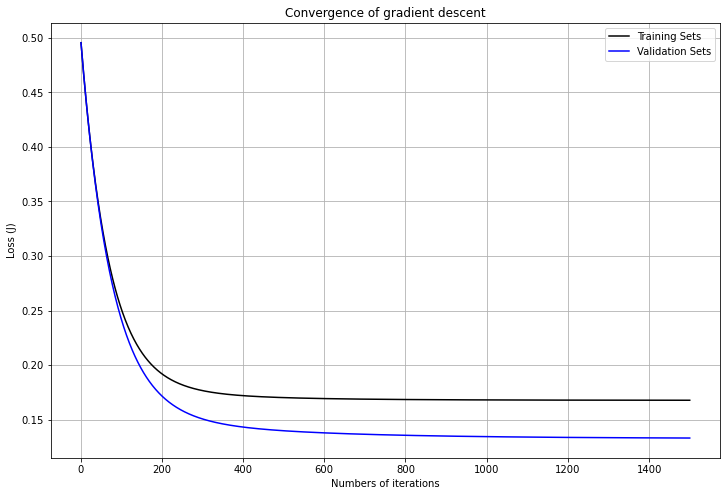

In [ ]:
plt.plot(range(1, iterations + 1), loss_history, color = 'black')
plt.plot(range(1, iterations + 1), loss_history_test, color = 'blue')
plt.rcParams["figure.figsize"] = [12,8]
plt.grid()
plt.legend(['Training Sets', 'Validation Sets'])
plt.xlabel("Numbers of iterations")
plt.ylabel("Loss (J)")
plt.title("Convergence of gradient descent")